In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Visualization for HCS algorithm

In [2]:
# Load csv file containing info
raw = pd.read_csv("./csvs/default.csv")
raw.head()

,Number of nodes,Number of Edges,Average Degree,Density,Cut-Ratio,Avg. internal density,Coverage,Performance
0,25,50,4.0,0.166667,0.020000,0.900000,0.900000,0.966667
1,50,225,9.0,0.183673,0.005000,0.977778,0.977778,0.991837
2,75,525,14.0,0.189189,0.002222,0.990476,0.990476,0.996396
3,100,950,19.0,0.191919,0.001250,0.994737,0.994737,0.997980
4,125,1500,24.0,0.193548,0.000800,0.996667,0.996667,0.998710


In [13]:
import pandas as pd
hcs_chord = pd.read_csv("csvs/chordal_graphs_first_50_low_density.picklenum-clusters.csv")
lpa_chord = pd.read_csv("csvs/LPA_chordal_graphs_first_50_low_density.picklenum-clusters.csv")

lpa_rel = pd.read_csv("csvs/LPA_NEW_relaxed_connected_cavemen_graphs_50.pklnum-cluster.csv")
hcs_rel = pd.read_csv("csvs/NEW_relaxed_connected_cavemen_graphs_50.pklnum-cluster.csv")

hcs_cav = pd.read_csv("csvs/NEW_connected_cavemen_graphs_100.pklnum-cluster.csv")
lpa_cav = pd.read_csv("csvs/LPA_NEW_connected_cavemen_graphs_100.pklnum-clusters.csv")

hcs_udis = pd.read_csv("csvs/unitd_graphs_first_50.picklenum-clusters.csv")
lpa_udis = pd.read_csv("csvs/LPA_unitd_graphs_first_50.picklenum-clusters.csv")

In [71]:

def plot_metrics_density(arr,title):
    

    fig, axs = plt.subplots(2,2, figsize=(15, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.15)
    fig.suptitle(title)
    metric= "Num of Clusters"
    for ax, algo in zip(axs.ravel(), arr):
        raw = algo[0][:40]
        raw_hcs = algo[1][:40]
        # Plot node vs density
        ax.plot(raw["Density"],raw[metric],'rx-', color='red', label="LPA")
        ax.set_title(f'Density Vs {metric}')
        ax.set_xlabel('Density')
        ax.set_ylabel(metric)  

         # Plot node vs density
        ax.plot(raw_hcs["Density"],raw_hcs[metric],'b.-', color='blue', label="HCS")
        ax.set_title(f'Density Vs {metric}')
        ax.set_xlabel('Density')
        ax.set_ylabel(metric)  
        ax.legend()


C:\Users\sqbis\AppData\Local\Temp/ipykernel_13904/2574628820.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(raw["Density"],raw[metric],'rx-', color='red', label="LPA")
C:\Users\sqbis\AppData\Local\Temp/ipykernel_13904/2574628820.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(raw_hcs["Density"],raw_hcs[metric],'b.-', color='blue', label="HCS")
C:\Users\sqbis\AppData\Local\Temp/ipykernel_13904/2574628820.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(raw["Density"],raw[metric],'rx-', color='red', label="LPA")
C:\Users\sqbis\AppData\Local\Temp/ipykernel_13904/2574628820.py:18: UserWarning: color is redundantly d

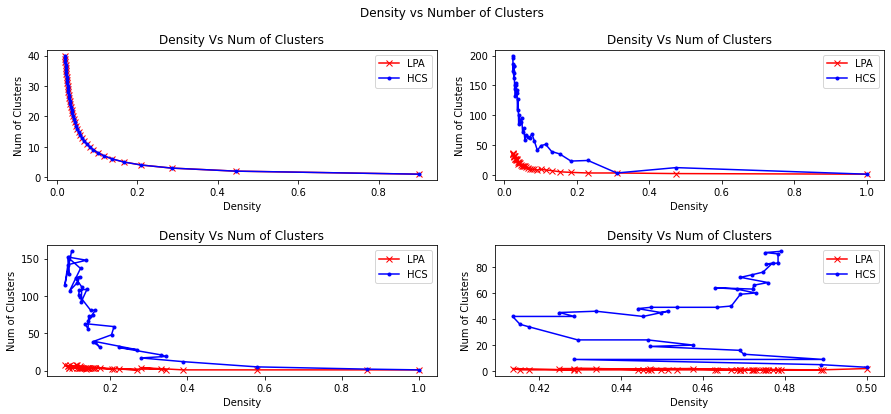

In [72]:
plot_metrics_density([[lpa_cav,hcs_cav],[lpa_rel,hcs_rel], [lpa_chord,hcs_chord], [lpa_udis,hcs_udis]], title="Density vs Number of Clusters for all graph families")


In [59]:

def plot_metrics_nodes(raw_lpa, raw_hcs,title):
    PERFOMANCE_METRICS = ["Cut-Ratio", "Num of Clusters","Modularity", "Performance"]
    raw = raw_lpa[:40]
    raw_hcs = raw_hcs[:40]

    fig, axs = plt.subplots(2,2, figsize=(15, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.15)
    fig.suptitle("Algorithm: LPA, "+title)

    for ax, metric in zip(axs.ravel(), PERFOMANCE_METRICS):
        # Plot node vs density
        ax.plot(raw["Number of nodes"],raw[metric],'rx-', color='red', label="LPA")
        ax.set_title(f'Number of nodes Vs {metric}')
        ax.set_xlabel('Number of nodes')
        ax.set_ylabel(metric)  

         # Plot node vs density
        ax.plot(raw_hcs["Number of nodes"],raw_hcs[metric],'b.-', color='blue', label="HCS")
        ax.set_title(f'Number of nodes Vs {metric}')
        ax.set_xlabel('Number of nodes')
        ax.set_ylabel(metric)  
        ax.legend()

    # if(raw_hcs.all().all() != None):
    #     fig, axs = plt.subplots(2,2, figsize=(15, 6), facecolor='w', edgecolor='k')
    #     fig.subplots_adjust(hspace = .5, wspace=.15)
    #     fig.suptitle("Algorithm: HCS, "+title)
    #     for ax, metric in zip(axs.ravel(), PERFOMANCE_METRICS):
    #         # Plot node vs density
    #         ax.plot(raw_hcs["Number of nodes"],raw_hcs[metric],'b^-', color='blue')
    #         ax.set_title(f'Number of nodes Vs {metric}')
    #         ax.set_xlabel('Number of nodes')
    #         ax.set_ylabel(metric)  
        
    # for idx, metric in enumerate(PERFOMANCE_METRICS):

    #     # Plot edges vs density
    #     plt.figure()
    #     plt.scatter(raw["Number of Edges"],raw[metric], color='purple', marker='x')
    #     plt.title(f'Number of Edges Vs {metric}', fontsize=14)
    #     plt.xlabel('Number of Edges', fontsize=14)
    #     plt.ylabel(metric, fontsize=14)
    #     plt.grid(True)
    #     plt.show()

C:\Users\sqbis\AppData\Local\Temp/ipykernel_13904/301051492.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(raw["Number of nodes"],raw[metric],'rx-', color='red', label="LPA")
C:\Users\sqbis\AppData\Local\Temp/ipykernel_13904/301051492.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(raw_hcs["Number of nodes"],raw_hcs[metric],'b.-', color='blue', label="HCS")
C:\Users\sqbis\AppData\Local\Temp/ipykernel_13904/301051492.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(raw["Number of nodes"],raw[metric],'rx-', color='red', label="LPA")
C:\Users\sqbis\AppData\Local\Temp/ipykernel_13904/301051492.py:18: UserWarning: co

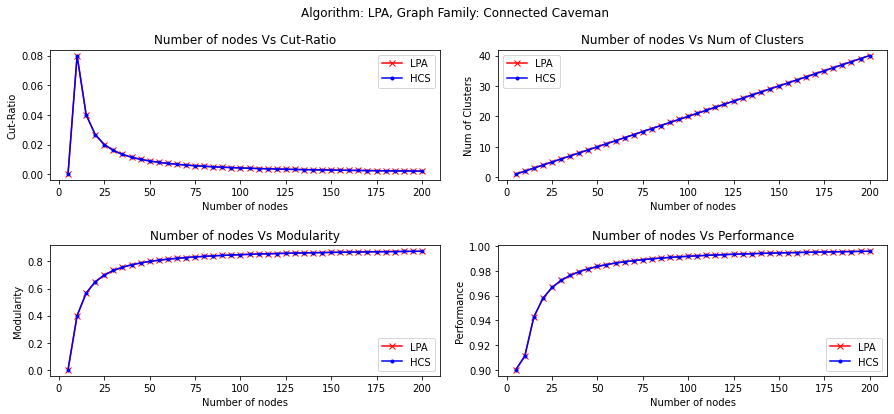

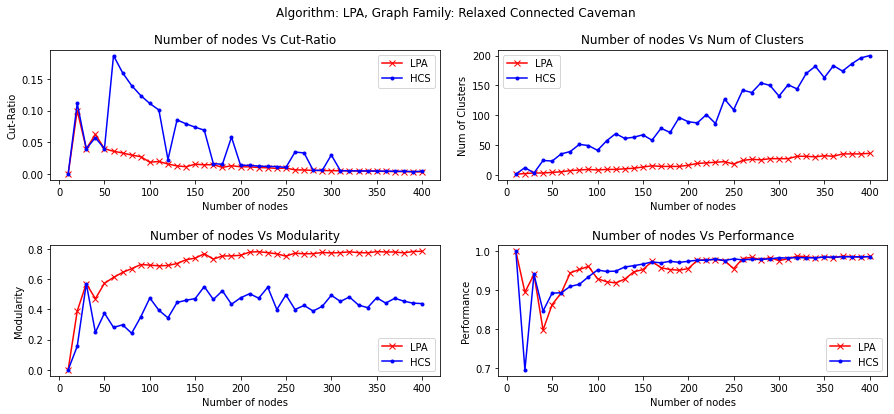

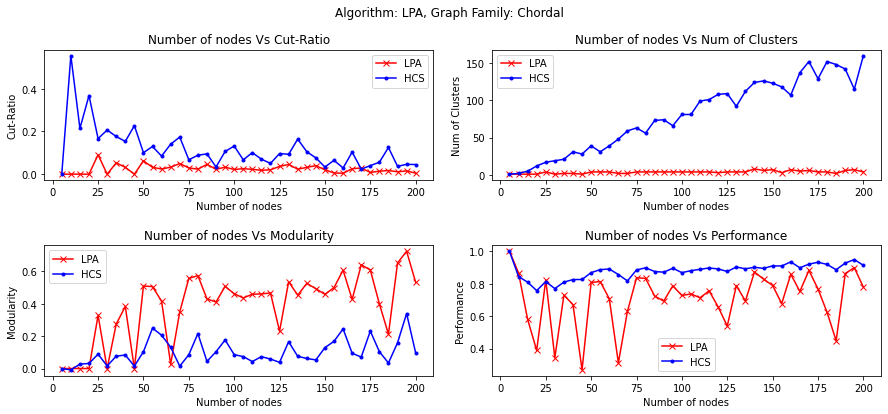

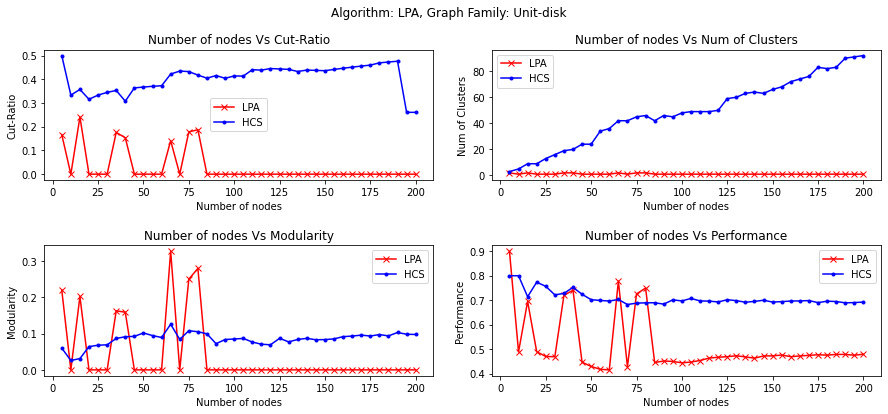

In [60]:
plot_metrics_nodes(lpa_cav,hcs_cav, title="Graph Family: Connected Caveman")
plot_metrics_nodes(lpa_rel,hcs_rel, title="Graph Family: Relaxed Connected Caveman")
plot_metrics_nodes(lpa_chord,hcs_chord, title="Graph Family: Chordal")
plot_metrics_nodes(lpa_udis,hcs_udis, title="Graph Family: Unit-disk")

Text(0.5, 1.0, 'Number of clusters for a \nunit disk graph of \nsize 50 & 100')

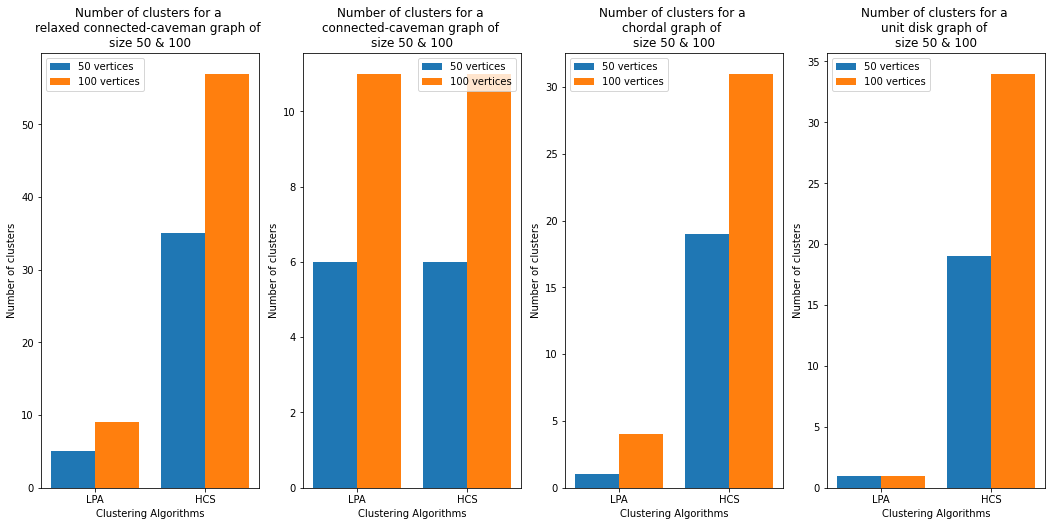

In [33]:
idx=5
idx2=10
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,8)
X = ["LPA", "HCS"]
X_axis = np.arange(len(X))
y = [lpa_rel.iloc[idx]["Num of Clusters"], hcs_rel.iloc[idx]["Num of Clusters"]]
y2 = [lpa_rel.iloc[idx2]["Num of Clusters"], hcs_rel.iloc[idx2]["Num of Clusters"]]

plt.subplot(1,4,1)
plt.bar(X_axis-0.2,y, 0.4, label="50 vertices")
plt.bar(X_axis+0.2,y2, 0.4, label="100 vertices")
plt.xticks(X_axis, X)
plt.legend()
plt.xlabel("Clustering Algorithms")
plt.ylabel("Number of clusters")
plt.title("Number of clusters for a \nrelaxed connected-caveman graph of \nsize 50 & 100")

X = ["LPA", "HCS"]
y = [lpa_cav.iloc[idx]["Num of Clusters"], hcs_cav.iloc[idx]["Num of Clusters"]]
y2 = [lpa_cav.iloc[idx2]["Num of Clusters"], hcs_cav.iloc[idx2]["Num of Clusters"]]

plt.subplot(1,4,2)
plt.bar(X_axis-0.2,y, 0.4, label="50 vertices")
plt.bar(X_axis+0.2,y2, 0.4, label="100 vertices")
plt.xticks(X_axis, X)
plt.legend()
plt.xlabel("Clustering Algorithms")
plt.ylabel("Number of clusters")
plt.title("Number of clusters for a \nconnected-caveman graph of \nsize 50 & 100")

plt.subplot(1,4,3)
X_ = ["LPA", "HCS"]
y = [lpa_chord.iloc[idx]["Num of Clusters"], hcs_chord.iloc[idx]["Num of Clusters"]]
y2 = [lpa_chord.iloc[idx2]["Num of Clusters"], hcs_chord.iloc[idx2]["Num of Clusters"]]

plt.bar(X_axis-0.2,y, 0.4, label="50 vertices")
plt.bar(X_axis+0.2,y2, 0.4, label="100 vertices")
plt.xticks(X_axis, X)
plt.legend()
plt.xlabel("Clustering Algorithms")
plt.ylabel("Number of clusters")
plt.title("Number of clusters for a \nchordal graph of \nsize 50 & 100")

plt.subplot(1,4,4)
X_ = ["LPA", "HCS"]
y_ = [lpa_udis.iloc[idx]["Num of Clusters"], hcs_udis.iloc[idx]["Num of Clusters"]]
y2 = [lpa_udis.iloc[idx2]["Num of Clusters"], hcs_udis.iloc[idx2]["Num of Clusters"]]

plt.bar(X_axis-0.2,y, 0.4, label="50 vertices")
plt.bar(X_axis+0.2,y2, 0.4, label="100 vertices")
plt.xticks(X_axis, X)
plt.legend()

plt.xlabel("Clustering Algorithms")
plt.ylabel("Number of clusters")
plt.title("Number of clusters for a \nunit disk graph of \nsize 50 & 100")